<a href="https://colab.research.google.com/github/Sukriti111/AI-coursework/blob/main/car_evaluation_Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#importing pandas
import pandas as pd

In [54]:
df= pd.read_csv ("/content/car.dataset.csv")

In [55]:
df.shape

(1728, 8)

In [56]:
df.head()

,0,1,2,3,4,5,6,binary_class
0,vhigh,vhigh,2,2,small,low,unacc,unacceptable
1,vhigh,vhigh,2,2,small,med,unacc,unacceptable
2,vhigh,vhigh,2,2,small,high,unacc,unacceptable
3,vhigh,vhigh,2,2,med,low,unacc,unacceptable
4,vhigh,vhigh,2,2,med,med,unacc,unacceptable


In [57]:
df.columns = [
    "buying", "maintenance", "doors",
    "persons", "lug_boot", "safety",
    "class_type", "recordID"
]


In [58]:
df = df[df["class_type"].isin(["unacc", "good"])]

In [59]:
#map target
df["target"] = df["class_type"].map({"unacc": 0, "good": 1})

In [60]:
#removing rows with missing class_type
df = df.dropna(subset=["class_type"]).copy()

#mapping unacc is 0, good is 1
df["target"] = df["class_type"].map({"unacc": 0, "good": 1})
print(df["target"].value_counts())


target
0    1210
1      69
Name: count, dtype: int64


In [61]:
#removing duplicates
df = df.drop_duplicates()

In [62]:
#encoding the features
from sklearn.preprocessing import LabelEncoder
feature_columns = ["buying", "maintenance", "doors", "persons", "lug_boot", "safety"]
for cols in feature_columns: df[cols] = LabelEncoder().fit_transform(df[cols])

In [63]:
#feature column and target split
X= df[feature_columns]
y= df["target"]

In [64]:
print (X.shape)
print(y.shape)

(1279, 6)
(1279,)


In [65]:
#create target if missing just for safety
if "target" not in df.columns:
    df["target"] = df["class_type"].map({"unacc": 0, "good": 1})

In [66]:
#EDA/ visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style= "whitegrid")

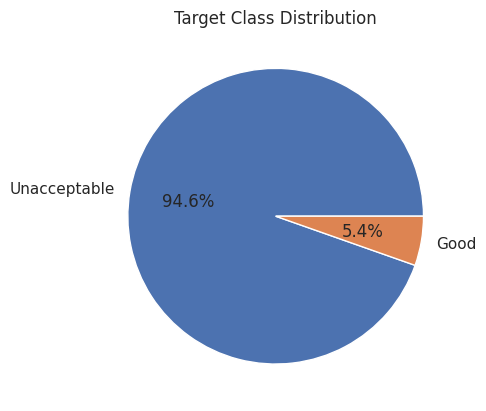

In [67]:
#Pie chart for target distribution
plt.figure()
df["target"].value_counts().plot.pie(
    autopct="%1.1f%%",
    labels=["Unacceptable", "Good"]
)
plt.title("Target Class Distribution")
plt.ylabel("")
plt.show()

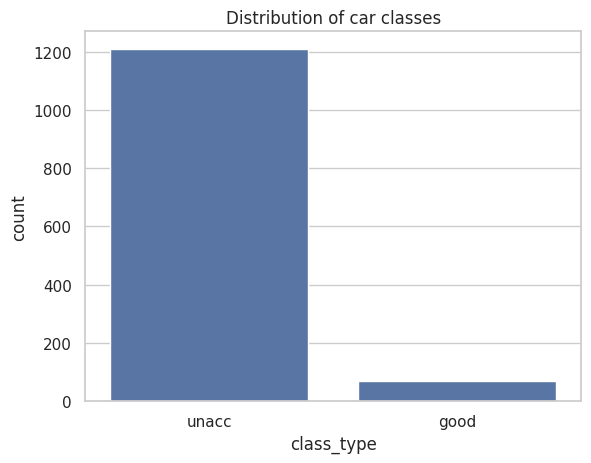

In [68]:
#Bar chart for class distribution
plt.figure()
sns.countplot(x="class_type", data=df)
plt.title("Distribution of car classes")
plt.show()

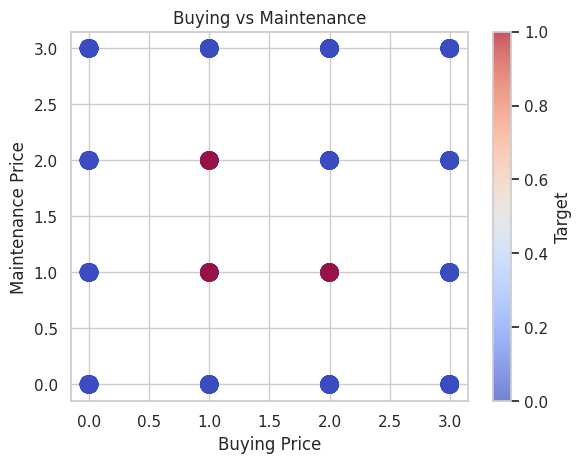

In [69]:
#Buying vs Maintenance with Luggage size and Car Acceptability scatter plot
plt.scatter(
    x=df['buying'],
    y=df['maintenance'],
    s=(df['lug_boot']+1)*50,
    c=df['target'],
    cmap='coolwarm',
    alpha=0.7
)
plt.xlabel("Buying Price")
plt.ylabel("Maintenance Price")
plt.title("Buying vs Maintenance")
plt.colorbar(label="Target")
plt.show()

/tmp/ipython-input-13122493.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="safety", y="target", data=df, ci=None)


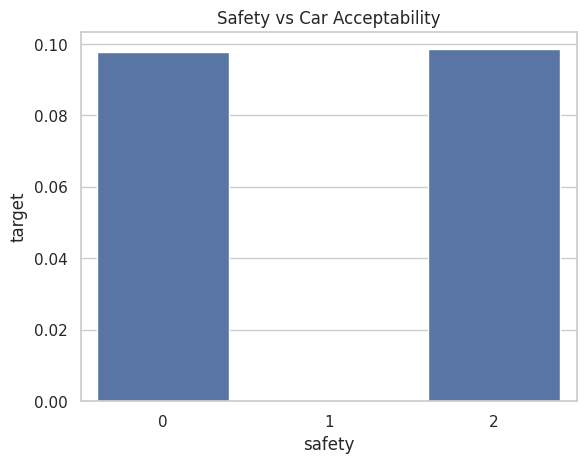

In [70]:
#Bar chart for Safety vs Target
plt.figure()
sns.barplot(x="safety", y="target", data=df, ci=None)
plt.title("Safety vs Car Acceptability")
plt.show()

/tmp/ipython-input-2333319814.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="persons", y="target", data=df, ci=None)


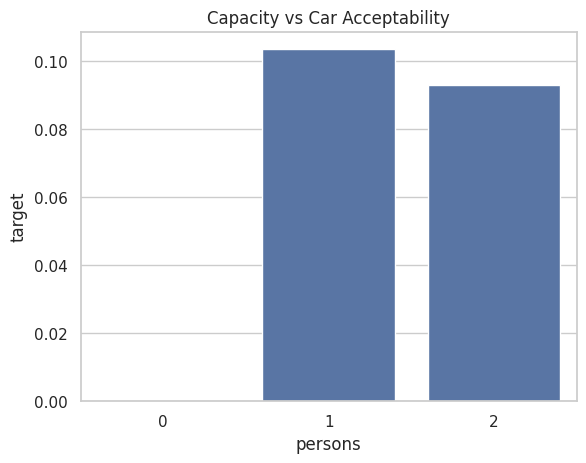

In [71]:
#Bar chart for Persons vs Target
plt.figure()
sns.barplot(x="persons", y="target", data=df, ci=None)
plt.title("Capacity vs Car Acceptability")
plt.show()

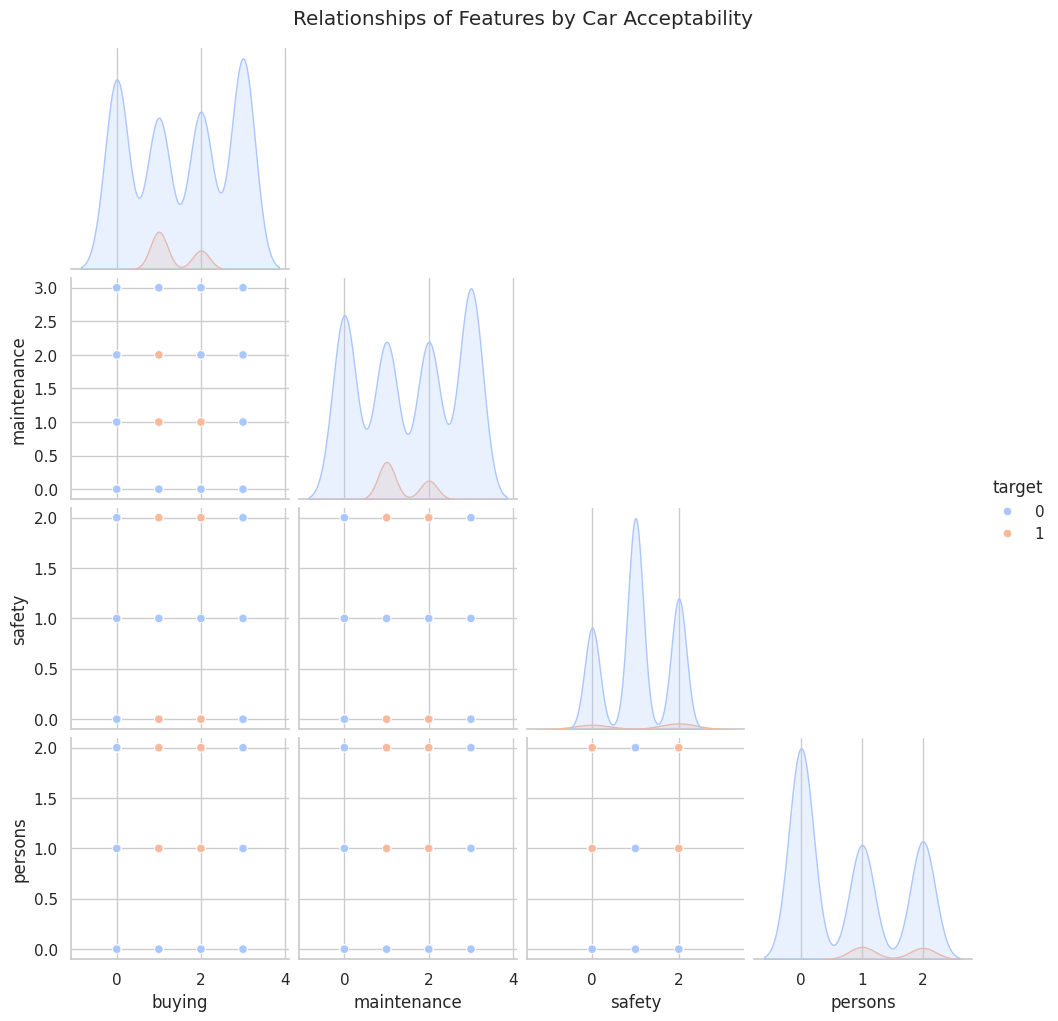

In [72]:
# Pairplot for relation of features to know the car quality
sns.pairplot(df[['buying', 'maintenance', 'safety', 'persons', 'target']],
             hue='target',
             palette='coolwarm',
             diag_kind='kde',
             corner=True)
plt.suptitle("Relationships of Features by Car Acceptability", y=1.02)
plt.show()


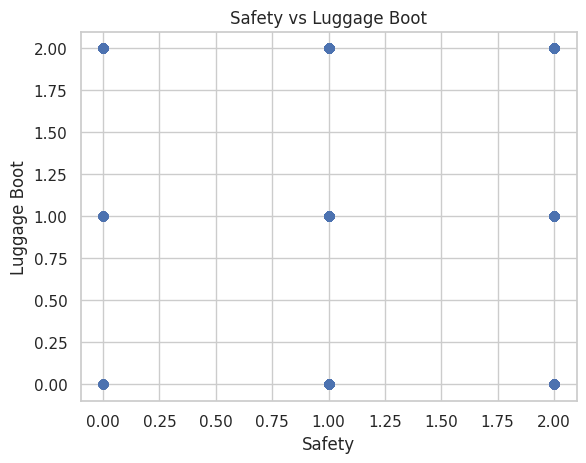

In [73]:
#dotted scatter plot for Safety vs Luggage Boot
plt.figure()
plt.scatter(df["safety"], df["lug_boot"])
plt.xlabel("Safety")
plt.ylabel("Luggage Boot")
plt.title("Safety vs Luggage Boot")
plt.show()

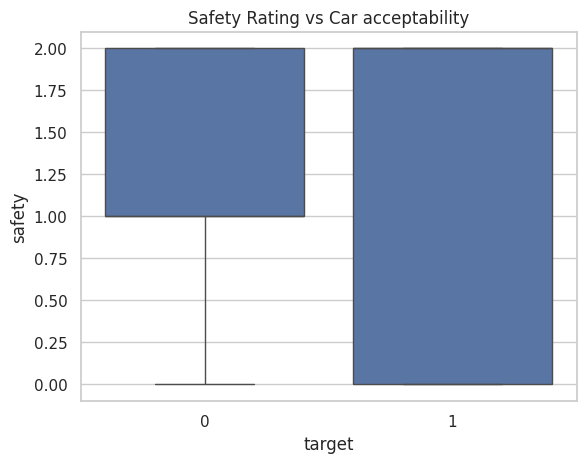

In [74]:
#boxplot for safety rating vs target
sns.boxplot(x="target", y="safety", data=df)
plt.title("Safety Rating vs Car acceptability")
plt.show()

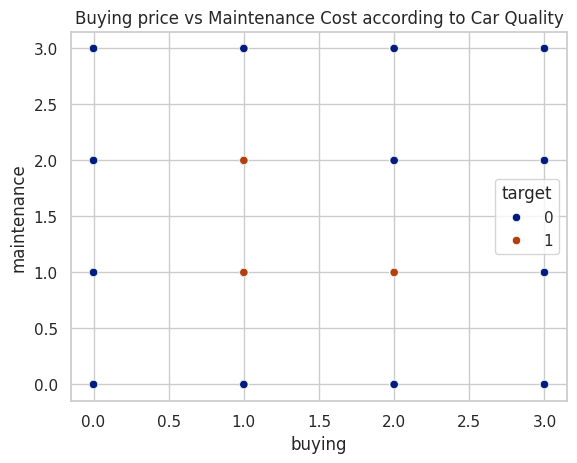

In [75]:
#scatter plot for buying vs maintenance
sns.scatterplot(x="buying", y="maintenance", hue="target", data=df, palette="dark")
plt.title("Buying price vs Maintenance Cost according to Car Quality")
plt.show()


In [81]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [83]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
# logistic regression
lregression_model = LogisticRegression(max_iter=500)
lregression_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [85]:
#decision tree
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

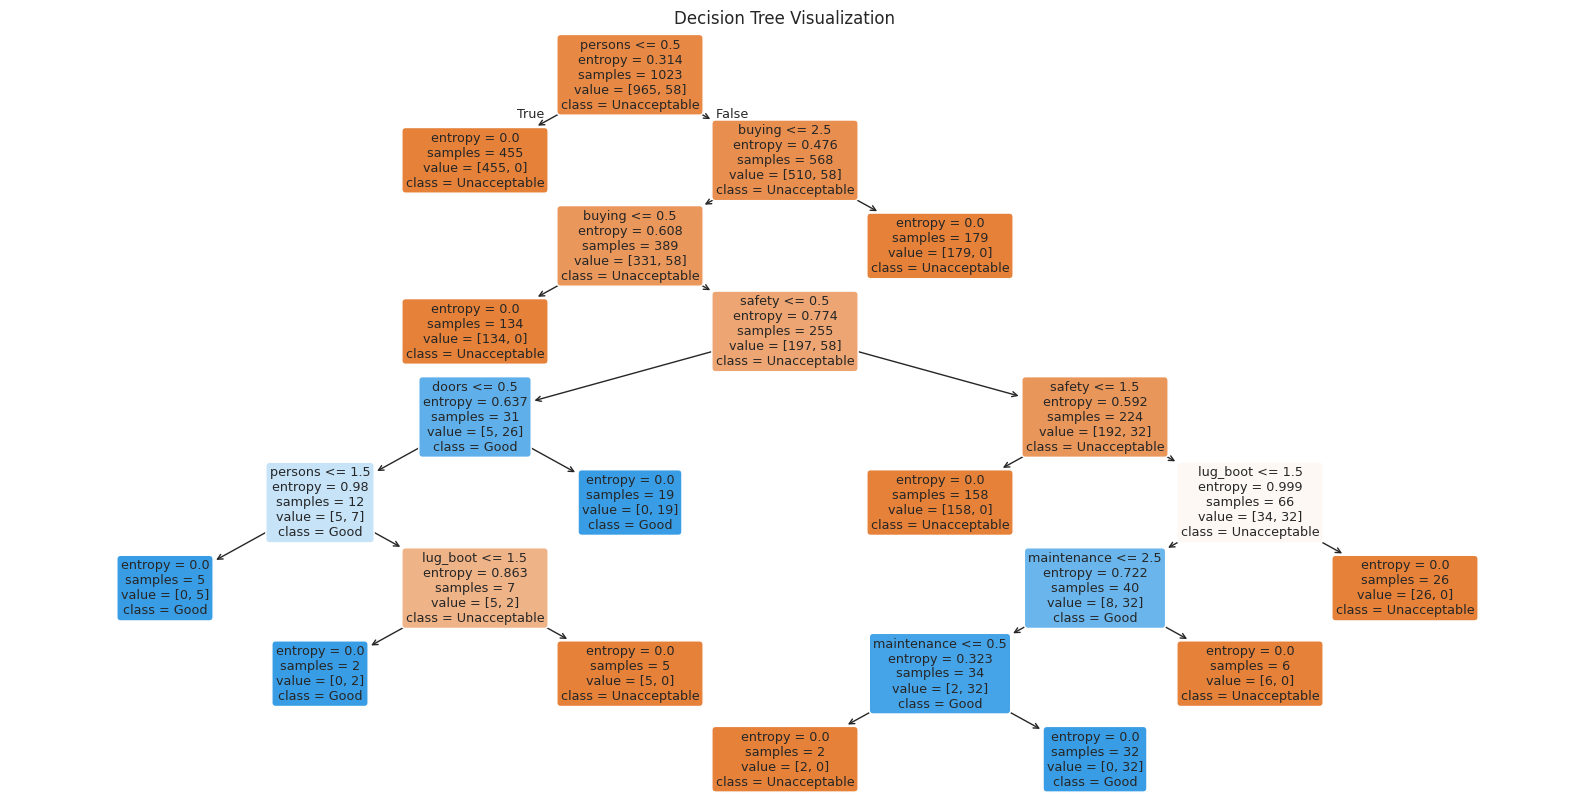

In [86]:
#decision tree diagram
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree,
    feature_names=feature_columns,
    class_names=["Unacceptable", "Good"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree visualization")
plt.show()

In [87]:
# predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_lregression = lregression_model.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)


KNN Accuracy: 0.9961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       0.92      1.00      0.96        11

    accuracy                           1.00       256
   macro avg       0.96      1.00      0.98       256
weighted avg       1.00      1.00      1.00       256

------------------------------------------------------------

Logistic Regression Accuracy: 0.9570
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       245
           1       0.00      0.00      0.00        11

    accuracy                           0.96       256
   macro avg       0.48      0.50      0.49       256
weighted avg       0.92      0.96      0.94       256

------------------------------------------------------------

Decision Tree Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


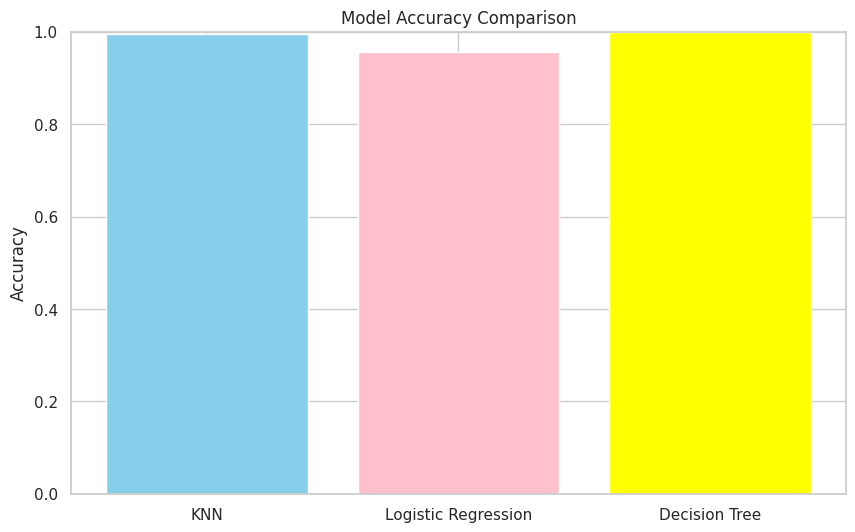

In [88]:
from sklearn.metrics import classification_report, accuracy_score

#Define your models in a dictionary
models = {
    "KNN": knn_model,
    "Logistic Regression": lregression_model,
    "Decision Tree": decision_tree
}

#Initialize dictionary to store accuracy values
accuracies = {}

#Loop through the models to print reports and store scores
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

#Create the Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=["skyblue", "pink", "yellow"])

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

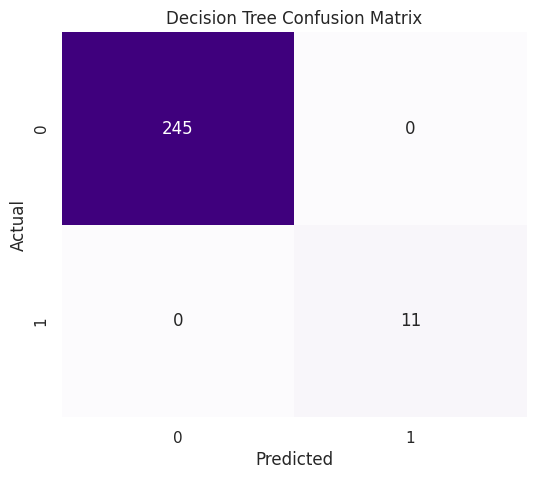

In [89]:
#confusion matrix for decision tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,5))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

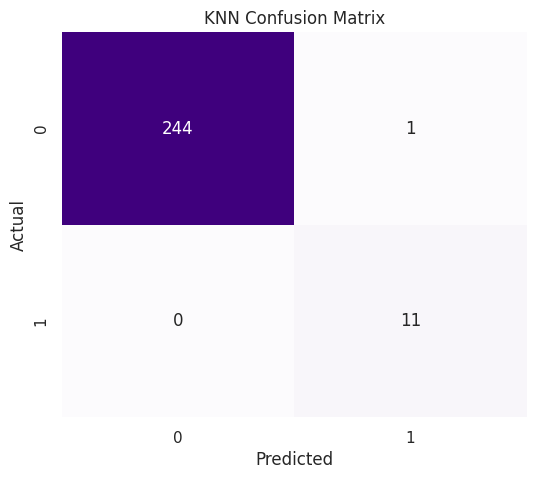

In [90]:
#confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

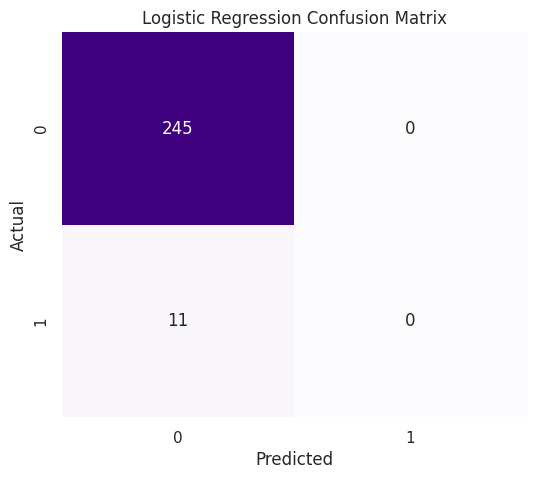

In [91]:
#confusion matrix for logistic regression
cmatrix_lregression = confusion_matrix(y_test, y_pred_lregression)
cm_lr = confusion_matrix(y_test, y_pred_lregression)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

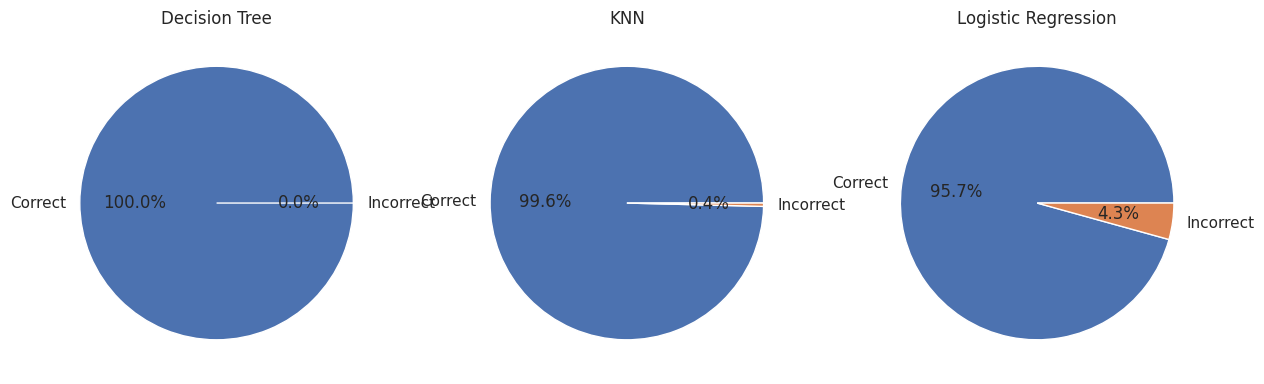

In [92]:
#prediction performance comparision of machine learning models
models = {
    "Decision Tree": decision_tree,
    "KNN": knn_model,
    "Logistic Regression": lregression_model
}

plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    correct = (y_pred == y_test).sum()
    incorrect = len(y_test) - correct

    plt.subplot(1, 3, i)
    plt.pie([correct, incorrect],
            labels=["Correct", "Incorrect"],
            autopct="%1.1f%%")
    plt.title(name)

plt.show()